## Práctica o 
### Miguel Alfonso Zapata De La Cruz

<img src= 'Practica_0.jpg' width="600px">

In [1]:
import numpy as np
import matplotlib.pyplot as mpl
from scipy.stats import norm 
#Practica

### Generamos 100 veces los primeros 10 elementos de forma aleatoria 

In [2]:
mu = 0
sigma = 1.0 
dis_1 = []
dis_2 = []
dis_3 = []
for k in range(100): 
  dis_1.append(np.random.normal(mu,sigma,10))


## De forma análoga para 100 elementos 

In [3]:
for k in range(100): 
  dis_2.append(np.random.normal(mu,sigma,100))


## Y finalmente para 1000 elementos 

In [4]:
for k in range(100):
    dis_3.append(np.random.normal(mu,sigma,1000))

## Ahora calculamos los promedios para 10, 100 y 1000 elementos 

In [5]:
prom1 = []
prom2 = []
prom3 = []

for i in dis_1:
    prom1.append(np.mean(i))

for j in dis_2: 
    prom2.append(np.mean(j))

for k in dis_3: 
    prom3.append(np.mean(k))

s1 = np.std(prom1)
s2 = np.std(prom2)
s3 = np.std(prom3)

## Recordando la formula para la desviación estándar $$ \sigma \thickapprox  \frac{1}{\sqrt{N}} $$
## Calculamos 

In [6]:
s11 = (10)**(-0.5)
s22 = (100)**(-0.5)
s33 = (1000)**(-0.5)

In [7]:
# Para 10 elementos tenemos 
print(s1,s11)
print(s2,s22)
print(s3,s33)

#Vemos que se cumple la aproximación

0.2905292709438213 0.31622776601683794
0.10401130243805054 0.1
0.029223782410183096 0.03162277660168379


## Lo cual verifica que aproximadamente $ \sigma \thickapprox  \frac{1}{\sqrt{N}} $

## Segunda parte 

In [4]:
# 1) Leemos e imprimimos el archivo 
dgauss = np.loadtxt('PDF_double_gauss_2021.txt')
print(dgauss)

[[0.00000000e+00 7.08271527e-09]
 [1.00000000e-02 7.21797517e-09]
 [2.00000000e-02 7.35574896e-09]
 ...
 [2.99800000e+01 5.72470107e-06]
 [2.99900000e+01 5.64269933e-06]
 [3.00000000e+01 5.56181040e-06]]


## Usando el formula de los intervalos, en la regla de Simpson compuestas en la forma $ h = \frac{b-a}{n}$, donde $a$ y $b$ son los extremos del intervalo y $n$, el número de subintervalos

In [5]:
# 2) Calculando el elemento dx 
i = 0
x = [fila[i] for fila in dgauss]
d = len(x)
j = 1 
y = [fila[j] for fila in dgauss]

dx = (x[-1]-x[0])/(d-1)
print('El tamaño de dx es',dx)


El tamaño de dx es 0.01


In [6]:
# 3) Verificamos 
j = 1
pdf_arr = [fila[j] for fila in dgauss]
sum = np.sum(pdf_arr)
print('El resultado de la multiplación es ',sum*dx)

#Podemos ver que el resultado es muy cerca de la unidad. 

El resultado de la multiplación es  0.9999963524247931


In [18]:
# 4) Ahora encontramos cumulative distribution function (CDF), para esto recordemos que 
# se obtiene al sumar la función de densidad de probabilidad. Así 
x_ar   = dgauss[:,0]
pdf_array = dgauss[:,1] 

cumul_ar =np.cumsum(pdf_array)
cumul_ar



array([7.08271527e-09, 1.43006904e-08, 2.16564394e-08, ...,
       9.99996240e+01, 9.99996297e+01, 9.99996352e+01])

Text(0, 0.5, 'Probabilty Distribution Function (PDF)')

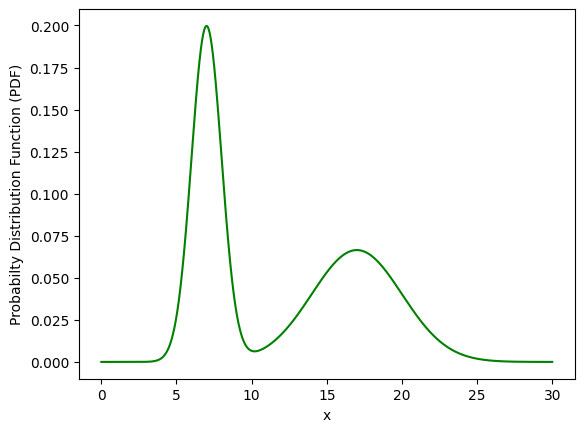

In [19]:
# 5) Realizamos los plots de PDF y CDF 

pdf_plot = mpl.plot(x_ar,pdf_array, color = 'green' )
mpl.xlabel('x')
mpl.ylabel('Probabilty Distribution Function (PDF)')


Text(0, 0.5, 'cumulative distribution function (CDF)')

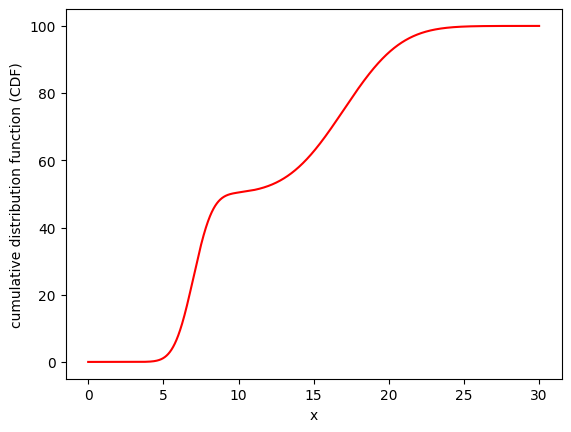

In [20]:
cdf_plot = mpl.plot(x_ar,comul_array, color = 'red' )
mpl.xlabel('x')
mpl.ylabel('cumulative distribution function (CDF)')

In [88]:
# 6)  Now, using the trials from CFD and the uniform trials, we generate 20,000 new trials, for this, we started for the first element 
# and finished for the last element

x_i = cumul_ar[0]
x_f = cumul_ar[-1]
myrandom_arr = np.random.uniform(x_i, x_f, 20000)
 


In [91]:
# 7) from myrandom_arr, we can generate a new random trials


z = []  
for i in range(myrandom_arr.shape[0]):
 x = myrandom_arr[i]
 y = np.absolute(cumul_ar - x) 
 index = np.argmin(y) 
 z.append(index)




In [103]:
# Now, we reorder the trials from dgauus with respect to the z

T = np.array([dgauss[j,0] for j in z ])

# Finally, we calculate the norm=1 and verify
T_norm = np.linalg.norm(T)
W = T/T_norm
np.linalg.norm(W)


1.0

(array([  1.,   0.,   1.,   0.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,
          1.,   4.,   2.,   0.,   3.,   5.,   4.,   5.,   3.,   1.,   3.,
         11.,   5.,   5.,  10.,  11.,   8.,   7.,  19.,  16.,  14.,  17.,
         25.,  21.,  23.,  35.,  31.,  50.,  32.,  48.,  47.,  47.,  59.,
         57.,  66.,  65.,  79.,  80.,  98.,  78.,  92., 111., 112., 109.,
        136., 117., 120., 156., 147., 142., 185., 161., 148., 158., 184.,
        182., 204., 207., 202., 190., 223., 192., 207., 179., 210., 215.,
        194., 190., 208., 180., 203., 193., 182., 184., 185., 174., 169.,
        162., 161., 169., 132., 124., 137., 148., 119., 125., 107.,  94.,
         84.,  88.,  81.,  73.,  48.,  65.,  57.,  74.,  47.,  63.,  42.,
         49.,  43.,  38.,  33.,  39.,  40.,  20.,  12.,  19.,  13.,  16.,
         11.,  12.,  17.,   9.,  11.,  14.,  10.,   7.,  14.,   6.,   6.,
          7.,   6.,   3.,   5.,   4.,   8.,   7.,   6.,   4.,   8.,   3.,
          5.,   2.,   7.,  10.,   6., 

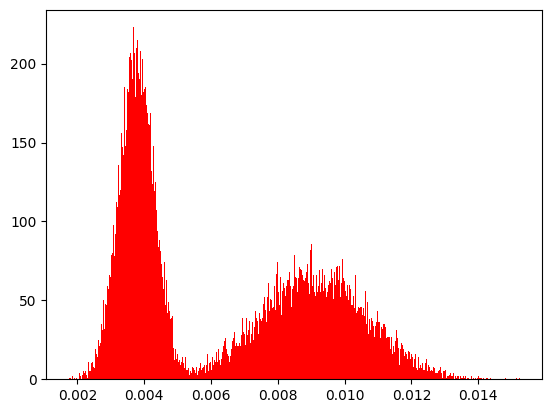

In [104]:
# The plots of the new distribution with 500 bins is 
mpl.hist(W,bins=500,color='red')

